# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Monopoly game described in the Homework and for which you wrote a Markov chain model:

<img src="monopoly.png" width="300px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* The jail does not prevent the player from continuing to play. In other words, when landing on the “GO TO JAIL” cell, the player jumps back to the “JAIL” cell, but resumes play immediately.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`.

**Note 2**: Make sure to print the result in the end.

---

In [32]:
import numpy as np

states = ["COLLECT $200", "VERMONT AVENUE", 
          "JAIL", "VIRGINIA AVENUE", 
          "FREE PARKING", "MARVIN GARDENS", 
          "GO TO JAIL", "PENNSYLVANIA AVENUE"]

x = 1/6

P = np.array([[0, x ,x ,x ,x ,x ,x, 0], \
              [0, 0 ,x ,x ,x ,x ,x, x], \
              [x, 0 ,0 ,x ,x ,x ,x, x], \
              [x, x ,0 ,0 ,x ,x ,x, x], \
              [x, x ,x ,0 ,0 ,x ,x, x], \
              [x, x ,x ,x ,0 ,0 ,x, x], \
              [0, 0 ,1 ,0 ,0 ,0 ,0, 0], \
              [x, x ,x ,x ,x ,x ,0, 0]])

print('X =', states)
print()
print('P = ')
print(np.around(P, 5))

X = ['COLLECT $200', 'VERMONT AVENUE', 'JAIL', 'VIRGINIA AVENUE', 'FREE PARKING', 'MARVIN GARDENS', 'GO TO JAIL', 'PENNSYLVANIA AVENUE']

P = 
[[ 0.       0.16667  0.16667  0.16667  0.16667  0.16667  0.16667  0.     ]
 [ 0.       0.       0.16667  0.16667  0.16667  0.16667  0.16667  0.16667]
 [ 0.16667  0.       0.       0.16667  0.16667  0.16667  0.16667  0.16667]
 [ 0.16667  0.16667  0.       0.       0.16667  0.16667  0.16667  0.16667]
 [ 0.16667  0.16667  0.16667  0.       0.       0.16667  0.16667  0.16667]
 [ 0.16667  0.16667  0.16667  0.16667  0.       0.       0.16667  0.16667]
 [ 0.       0.       1.       0.       0.       0.       0.       0.     ]
 [ 0.16667  0.16667  0.16667  0.16667  0.16667  0.16667  0.       0.     ]]


---

#### Activity 2.

Compute the probability of the following trajectories:

* "COLLECT \$200" - "VERMONT AVENUE" - "GO TO JAIL" - "JAIL"
* "COLLECT \$200" - "GO TO JAIL" - "JAIL" - "COLLECT \$200"
* "COLLECT \$200" - "PENNSYLVANIA AVENUE" - "COLLECT \$200"

**Note:** Make sure to print the result in the end.

---

In [33]:
chain1 = ["COLLECT $200", "VERMONT AVENUE", "GO TO JAIL", "JAIL"]
chain2 = ["COLLECT $200", "GO TO JAIL", "JAIL", "COLLECT $200"]
chain3 = ["COLLECT $200", "PENNSYLVANIA AVENUE", "COLLECT $200"]

chains = [chain1, chain2, chain3]

for chain in chains:
    prob = 1
    for state in chain[:len(chain) -1]:
        current_state_index = states.index(state)
        next_state_index = states.index(chain[chain.index(state) + 1])
        prob = prob * P[current_state_index, next_state_index]
    print(chain, "- prob = %.3f" % prob)   

['COLLECT $200', 'VERMONT AVENUE', 'GO TO JAIL', 'JAIL'] - prob = 0.028
['COLLECT $200', 'GO TO JAIL', 'JAIL', 'COLLECT $200'] - prob = 0.028
['COLLECT $200', 'PENNSYLVANIA AVENUE', 'COLLECT $200'] - prob = 0.000


### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

#### ---- *ANSWER* ----

- The chain is **irreducible** since there is only one communicating class. This means that for an infinite number of time-steps you can reach all the states from any other state.
- It is **aperiodic** since it has an infinite combination of sets of moves to reach the state from where it departed, i.e., all states x are aperiodic and gcd(x) = 1.
    For example, for the "Jail" state: 
        - Arrive back in "Jail" in two time-steps: dice gets 6 and then a 2.
        - Arrive back in "Jail" in three time-steps: dice gets 6 and then 1 and then 1.
    **This is valid for any other state.**
- Since it is **irreducible and aperiodic** there is a stationary destribution associated with this chain. For an infinite number of time-steps, the chain making it an ergotic chain.


---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [34]:
#Left eigenvectors are the transposed matrix right eigenvectors
eigvalues, norm_eigenvectors = np.linalg.eig(P.T)

#Find which eigenvector corresponds to the eigenvalue 1
index = np.where(np.around(eigvalues.real) == 1)[0][0]
res = norm_eigenvectors[:,index].real

#Stationary distribution must be a distribution
theoretical_distribution = np.around(res/sum(res),5)

print("Stationary distribution:", theoretical_distribution)

Stationary distribution: [ 0.11131  0.0935   0.21817  0.1094   0.10686  0.12467  0.12732  0.10877]


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [35]:
from random import randint
trajectory = []
trajectory = trajectory + [randint(0,7)]

for i in range(9999):
        possible_state = np.random.choice(states, size = 1,p =P[trajectory[-1]])
        trajectory = trajectory + [states.index(possible_state[0])]
        
named_trajectory = []
for state_index in trajectory:
    named_trajectory = named_trajectory + [states[state_index]]
print(named_trajectory)

['FREE PARKING', 'PENNSYLVANIA AVENUE', 'VERMONT AVENUE', 'VIRGINIA AVENUE', 'GO TO JAIL', 'JAIL', 'COLLECT $200', 'VIRGINIA AVENUE', 'GO TO JAIL', 'JAIL', 'PENNSYLVANIA AVENUE', 'VERMONT AVENUE', 'GO TO JAIL', 'JAIL', 'FREE PARKING', 'VERMONT AVENUE', 'JAIL', 'MARVIN GARDENS', 'VIRGINIA AVENUE', 'FREE PARKING', 'GO TO JAIL', 'JAIL', 'VIRGINIA AVENUE', 'PENNSYLVANIA AVENUE', 'FREE PARKING', 'JAIL', 'GO TO JAIL', 'JAIL', 'COLLECT $200', 'MARVIN GARDENS', 'PENNSYLVANIA AVENUE', 'VERMONT AVENUE', 'VIRGINIA AVENUE', 'VERMONT AVENUE', 'VIRGINIA AVENUE', 'VERMONT AVENUE', 'MARVIN GARDENS', 'VERMONT AVENUE', 'FREE PARKING', 'JAIL', 'MARVIN GARDENS', 'GO TO JAIL', 'JAIL', 'VIRGINIA AVENUE', 'MARVIN GARDENS', 'VIRGINIA AVENUE', 'GO TO JAIL', 'JAIL', 'MARVIN GARDENS', 'JAIL', 'MARVIN GARDENS', 'GO TO JAIL', 'JAIL', 'COLLECT $200', 'VERMONT AVENUE', 'GO TO JAIL', 'JAIL', 'MARVIN GARDENS', 'JAIL', 'MARVIN GARDENS', 'GO TO JAIL', 'JAIL', 'VIRGINIA AVENUE', 'VERMONT AVENUE', 'PENNSYLVANIA AVENUE', '

---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #4.

**Note**: Don't forget to load `matplotlib`.

---

[ 1108.   961.  2163.  1100.  1082.  1294.  1240.  1052.]


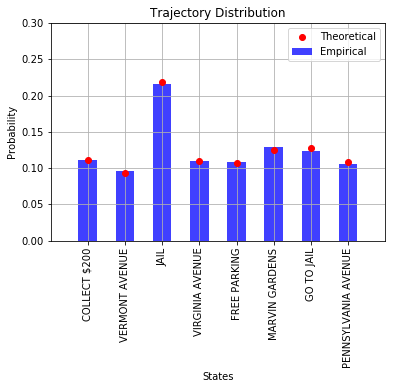

In [36]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

counts = np.zeros(8)
for state in trajectory:
    counts[state] +=1
print(counts)

data_x = [0, 1, 2, 3, 4, 5, 6, 7]
data_y = theoretical_distribution

n, bins, patches = plt.hist(trajectory, bins = np.arange(9)-0.5,normed=1, facecolor='blue', alpha=0.75, rwidth=0.5, align = "mid", histtype="bar")
plt.xlabel('States')
plt.ylabel('Probability')
plt.title("Trajectory Distribution")
plt.xticks(data_x, states, rotation='vertical')

plt.axis([-1, 8, 0, 0.3])
plt.grid(True)


plt.plot(data_x, data_y, 'or')
plt.legend(["Theoretical", "Empirical"])
plt.show()


The empirical distribution matches the theoretical distribution.